In [6]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Change the csv file paths as needed
root_dir = "C:\Capstone\Exp 1 Normalized"
filepaths = os.listdir(root_dir)
dataframes = [pd.read_csv(os.path.join(root_dir, path)) for path in filepaths]
all_data = pd.concat(dataframes)
emotions = all_data[(all_data['label'] != '[eee]') & (all_data['label'] != '[ugh]')]
lab_words = all_data[(all_data['label'] == '[eee]') | (all_data['label'] == '[ugh]')]
tube_words = pd.read_csv("C:\Capstone\Exp 2 Normalized\\all_data.csv")

In [14]:
# Get feature columns; convert to ndarrays
feature_columns = [x for x in all_data.columns if 'feature' in x]

emotion_features = emotions[feature_columns]
emotion_labels = emotions['label']
lab_word_features = lab_words[feature_columns]
lab_word_labels = lab_words['label']
tube_word_features = tube_words[feature_columns]
tube_word_labels = tube_words['label']

In [30]:
# perform pca
pca_data = pd.concat([emotion_features, lab_word_features])
pca_labels = pd.concat([emotion_labels, lab_word_labels])
pca_data_array = pca_data.values
pca_label_array = pca_labels.values
pca_plot = PCA(n_components=2)
data_embed = pca_plot.fit_transform(pca_data_array)
pca_var = PCA(n_components=pca_data_array.shape[1])
pca_var.fit(pca_data_array)

PCA(copy=True, iterated_power='auto', n_components=68, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

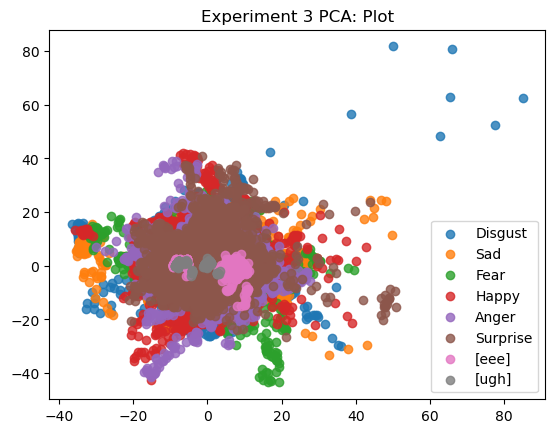

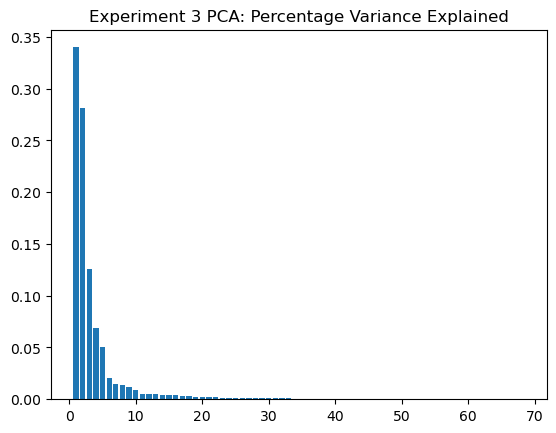

In [25]:
# generate plots
plt.figure()
for expression in pca_labels.unique():
  plt.scatter(
    data_embed[pca_label_array == expression, 0], data_embed[pca_label_array == expression, 1], alpha=0.8, label=expression
  )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("Experiment 1 PCA: Plot")

plt.figure()
plt.bar(range(1,pca_data_array.shape[1]+1), pca_var.explained_variance_ratio_)
plt.title("Experiment 1 PCA: Percentage Variance Explained")
plt.show()

In [33]:
print(sum(pca_var.explained_variance_ratio_[0:2]))
print(sum(pca_var.explained_variance_ratio_[0:5]))
print(sum(pca_var.explained_variance_ratio_[0:8]))
print(sum(pca_var.explained_variance_ratio_[0:13]))

0.6640114039250145
0.8728430929201905
0.9189386192073467
0.9507894117685982


In [ ]:
# find the mean and standard deviation of each feature and remove columns where a feature is 
# more than 4.18 standard deviations from mean
stdCutoff = 4.18

featuresPermed = np.transpose(features_all)
means = []
standard_deviations = []

print(features_all.shape, labels_all.shape)

for row in featuresPermed:
  means.append(np.mean(row))
  standard_deviations.append(np.std(row))

indeces_to_delete = []

for rowNum in range(len(features_all)):
  for i in range(len(features_all[rowNum])):
    if features_all[rowNum][i] < means[i] - stdCutoff*standard_deviations[i] or features_all[rowNum][i] > means[i] + stdCutoff*standard_deviations[i]:
      indeces_to_delete.append(rowNum)
      break

features_all = np.delete(features_all, indeces_to_delete, axis=0)
labels_all = np.delete(labels_all, indeces_to_delete)

print(features_all.shape, labels_all.shape)


(33303, 68) (33303,)
(32618, 68) (32618,)


In [ ]:
# Sanity check
# print(emotion_features.shape, emotion_labels.shape)
print(lab_word_features.shape, lab_word_labels.shape)
print(tube_word_features.shape, tube_word_labels.shape)

# Create train / test splits
# emotion_train_features, emotion_test_features, emotion_train_labels, emotion_test_labels = train_test_split(emotion_features, emotion_labels, test_size=0.20, random_state=0)
word_train_features, word_test_features, word_train_labels, word_test_labels = train_test_split(lab_word_features, lab_word_labels, test_size=0.20, random_state=0)

# Train classifier on emotion data
# rf = RandomForestClassifier(random_state=0)
# rf.fit(emotion_train_features, emotion_train_labels)
# accuracy = rf.score(emotion_test_features, emotion_test_labels)
# 
# print(accuracy)

# Train classifier on word data
rf = RandomForestClassifier(random_state=0)
rf.fit(word_train_features, word_train_labels)
#accuracy = rf.score(word_test_features, word_test_labels)
accuracy = rf.score(tube_word_features, tube_word_labels)

print(accuracy)

In [4]:
# Class mean differences
happy = np.mean(emotions[emotions['label'] == 'Happy'].drop('label', axis=1).values, axis=0)
sad = np.mean(emotions[emotions['label'] == 'Sad'].drop('label', axis=1).values, axis=0)
anger = np.mean(emotions[emotions['label'] == 'Anger'].drop('label', axis=1).values, axis=0)
fear = np.mean(emotions[emotions['label'] == 'Fear'].drop('label', axis=1).values, axis=0)
surprise = np.mean(emotions[emotions['label'] == 'Surprise'].drop('label', axis=1).values, axis=0)
disgust = np.mean(emotions[emotions['label'] == 'Disgust'].drop('label', axis=1).values, axis=0)
# eee = np.mean(lab_words[lab_words['label'] == '[eee]'].drop('label', axis=1).values, axis=0)
# ugh = np.mean(lab_words[lab_words['label'] == '[ugh]'].drop('label', axis=1).values, axis=0)
eee = np.mean(tube_words[tube_words['label'] == '[eee]'].drop('label', axis=1).values, axis=0)
ugh = np.mean(tube_words[tube_words['label'] == '[ugh]'].drop('label', axis=1).values, axis=0)

eee_happy = np.sqrt(np.sum((eee - happy)**2))
eee_sad = np.sqrt(np.sum((eee - sad)**2))
eee_anger = np.sqrt(np.sum((eee - anger)**2))
eee_fear = np.sqrt(np.sum((eee - fear)**2))
eee_surprise = np.sqrt(np.sum((eee - surprise)**2))
eee_disgust = np.sqrt(np.sum((eee - disgust)**2))
eee_ugh = np.sqrt(np.sum((eee - ugh)**2))
ugh_happy = np.sqrt(np.sum((ugh - happy)**2))
ugh_sad = np.sqrt(np.sum((ugh - sad)**2))
ugh_anger = np.sqrt(np.sum((ugh - anger)**2))
ugh_fear = np.sqrt(np.sum((ugh - fear)**2))
ugh_surprise = np.sqrt(np.sum((ugh - surprise)**2))
ugh_disgust = np.sqrt(np.sum((ugh - disgust)**2))
print(eee_happy, eee_sad, eee_anger, eee_fear, eee_surprise, eee_disgust, eee_ugh, ugh_happy, ugh_sad, ugh_anger, ugh_fear, ugh_surprise, ugh_disgust)

5.874520714915245 4.573956728094668 5.011156565880463 5.01690865816372 4.4858954492666525 4.923259384181443 8.246153531851276 4.820127703802357 5.6691162509903705 5.540146559075478 5.573661662527688 6.1746270468865 5.6831899386792575
